In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# pivot table data merged with the wildfire data
# 'lat_wildfire', 'lon_wildfire', 'closest_station_index', 'station_index', 'ID', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'STATE', 'NAME_station', 'GSN_FLAG', 'HCN_CRN_FLAG', 'WMO_ID', 'lat_station', 'lon_station', attr_FireDiscoveryDateTime, attr_FireOutDateTime, 'attr_FireCause', attr_FinalAcres, attr_EstimatedCostToDate
import pandas as pd

wildfires_with_closest_station_df = pd.read_csv('/content/drive/MyDrive/CS249-Winter2024-Project/wildfires-with-closest-station.csv', delimiter=',')
pivoted_weather_data_df = pd.read_csv('/content/drive/MyDrive/CS249-Winter2024-Project/pivot-table-weather.csv', delimiter=',')

print(list(wildfires_with_closest_station_df.columns))
print(list(pivoted_weather_data_df.columns))

['OBJECTID', 'poly_SourceOID', 'poly_IncidentName', 'poly_FeatureCategory', 'poly_MapMethod', 'poly_GISAcres', 'poly_CreateDate', 'poly_DateCurrent', 'poly_PolygonDateTime', 'poly_IRWINID', 'poly_FORID', 'poly_Acres_AutoCalc', 'poly_SourceGlobalID', 'poly_Source', 'attr_SourceOID', 'attr_ABCDMisc', 'attr_ADSPermissionState', 'attr_CalculatedAcres', 'attr_ContainmentDateTime', 'attr_ControlDateTime', 'attr_CreatedBySystem', 'attr_IncidentSize', 'attr_DiscoveryAcres', 'attr_DispatchCenterID', 'attr_EstimatedCostToDate', 'attr_FinalAcres', 'attr_FFReportApprovedByTitle', 'attr_FFReportApprovedByUnit', 'attr_FFReportApprovedDate', 'attr_FireBehaviorGeneral', 'attr_FireBehaviorGeneral1', 'attr_FireBehaviorGeneral2', 'attr_FireBehaviorGeneral3', 'attr_FireCause', 'attr_FireCauseGeneral', 'attr_FireCauseSpecific', 'attr_FireCode', 'attr_FireDepartmentID', 'attr_FireDiscoveryDateTime', 'attr_FireMgmtComplexity', 'attr_FireOutDateTime', 'attr_FireStrategyConfinePercent', 'attr_FireStrategyFullS

In [3]:

# # Assuming wildfires_with_closest_station_df is your wildfires DataFrame
relevant_columns = ['lat_wildfire', 'lon_wildfire','station_index','attr_PredominantFuelModel', 'ID', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'attr_FireDiscoveryDateTime', 'attr_FireOutDateTime', 'attr_FireCause', 'attr_FinalAcres', 'attr_EstimatedCostToDate']
wildfires_df_filtered = wildfires_with_closest_station_df[relevant_columns]

wildfires_df_filtered.iloc[:5]


,lat_wildfire,lon_wildfire,station_index,attr_PredominantFuelModel,ID,LATITUDE,LONGITUDE,ELEVATION,attr_FireDiscoveryDateTime,attr_FireOutDateTime,attr_FireCause,attr_FinalAcres,attr_EstimatedCostToDate
0,33.730003,-117.330945,1714,NaN,USC00042805,33.6861,-117.3458,386.5,2022-05-15 02:46:15,NaN,Undetermined,NaN,NaN
1,33.709946,-117.285183,1714,NaN,USC00042805,33.6861,-117.3458,386.5,2022-07-09 19:52:06,NaN,Undetermined,0.01,NaN
2,33.711170,-117.287700,1714,GS2,USC00042805,33.6861,-117.3458,386.5,2022-07-09 20:04:00,7/11/2022 5:28:00 PM,NaN,NaN,NaN
3,33.716649,-117.332692,1714,NaN,USC00042805,33.6861,-117.3458,386.5,2023-08-12 22:45:41,NaN,Undetermined,NaN,NaN
4,32.637513,-116.113672,862,NaN,US1CASD0117,32.6212,-116.1902,859.8,2021-01-15 20:11:39,NaN,Unknown,NaN,NaN


In [4]:
# Convert date columns to datetime
wildfires_df_filtered['attr_FireDiscoveryDateTime'] = pd.to_datetime(wildfires_df_filtered['attr_FireDiscoveryDateTime'])
wildfires_df_filtered['attr_FireOutDateTime'] = pd.to_datetime(wildfires_df_filtered['attr_FireOutDateTime'])
pivoted_weather_data_df['Timestamp'] = pd.to_datetime(pivoted_weather_data_df['Timestamp'])

# Resetting index if set previously
# wildfires_df_filtered.reset_index(inplace=True)
# pivoted_weather_data_df.reset_index(inplace=True)

# Outer join on 'ID'
combined_df = pd.merge(wildfires_df_filtered, pivoted_weather_data_df, on='ID', how='outer')
# Convert Timestamp, attr_FireDiscoveryDateTime, and attr_FireOutDateTime to datetime if not already
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])
combined_df['attr_FireDiscoveryDateTime'] = pd.to_datetime(combined_df['attr_FireDiscoveryDateTime'])
combined_df['attr_FireOutDateTime'] = pd.to_datetime(combined_df['attr_FireOutDateTime'])

# Function to check if the weather timestamp falls within the wildfire time range
def is_within_wildfire_period(row):
    if pd.notnull(row['attr_FireDiscoveryDateTime']) and pd.notnull(row['attr_FireOutDateTime']):
        return row['attr_FireDiscoveryDateTime'] <= row['Timestamp'] <= row['attr_FireOutDateTime']
    else:
        return True  # If no wildfire info, the weather data is always included

# Apply the function row-wise
combined_df['include'] = combined_df.apply(is_within_wildfire_period, axis=1)

# Filter the DataFrame based on the inclusion criterion
final_df = combined_df[combined_df['include']]
df_cleaned = final_df.dropna(subset=['attr_FireOutDateTime'])





<ipython-input-4-9651b1071b0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildfires_df_filtered['attr_FireDiscoveryDateTime'] = pd.to_datetime(wildfires_df_filtered['attr_FireDiscoveryDateTime'])
<ipython-input-4-9651b1071b0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildfires_df_filtered['attr_FireOutDateTime'] = pd.to_datetime(wildfires_df_filtered['attr_FireOutDateTime'])


In [5]:
pd.set_option('display.max_columns', None)

df_cleaned.head(5)

,lat_wildfire,lon_wildfire,station_index,attr_PredominantFuelModel,ID,LATITUDE,LONGITUDE,ELEVATION,attr_FireDiscoveryDateTime,attr_FireOutDateTime,attr_FireCause,attr_FinalAcres,attr_EstimatedCostToDate,Timestamp,AWND,PRCP,RHAV,RHMN,RHMX,TAVG,TMAX,TMIN,include
3853,33.711170,-117.287700,1714.0,GS2,USC00042805,33.6861,-117.3458,386.5,2022-07-09 20:04:00,2022-07-11 17:28:00,NaN,NaN,NaN,2022-07-10 12:00:00,NaN,0.0,NaN,NaN,NaN,NaN,383.0,167.0,True
3854,33.711170,-117.287700,1714.0,GS2,USC00042805,33.6861,-117.3458,386.5,2022-07-09 20:04:00,2022-07-11 17:28:00,NaN,NaN,NaN,2022-07-11 12:00:00,NaN,0.0,NaN,NaN,NaN,NaN,356.0,172.0,True
8807,32.646633,-116.105991,862.0,NaN,US1CASD0117,32.6212,-116.1902,859.8,2022-07-04 19:38:12,2022-07-06 20:10:00,NaN,NaN,NaN,2022-07-05 12:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True
8808,32.646633,-116.105991,862.0,NaN,US1CASD0117,32.6212,-116.1902,859.8,2022-07-04 19:38:12,2022-07-06 20:10:00,NaN,NaN,NaN,2022-07-06 12:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True
9192,32.635900,-116.123600,862.0,GR2,US1CASD0117,32.6212,-116.1902,859.8,2020-08-02 01:40:00,2020-08-12 15:34:00,NaN,NaN,NaN,2020-08-02 12:00:00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True


<ipython-input-7-30b981f705f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['discovery_hour'] = df_cleaned['attr_FireDiscoveryDateTime'].dt.hour
<ipython-input-7-30b981f705f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['elevation_bin'] = pd.cut(df_cleaned['ELEVATION'], bins=[0, 200, 400, 600, 800, 1000, np.inf], labels=['0-200', '200-400', '400-600', '600-800', '800-1000', '1000+'])


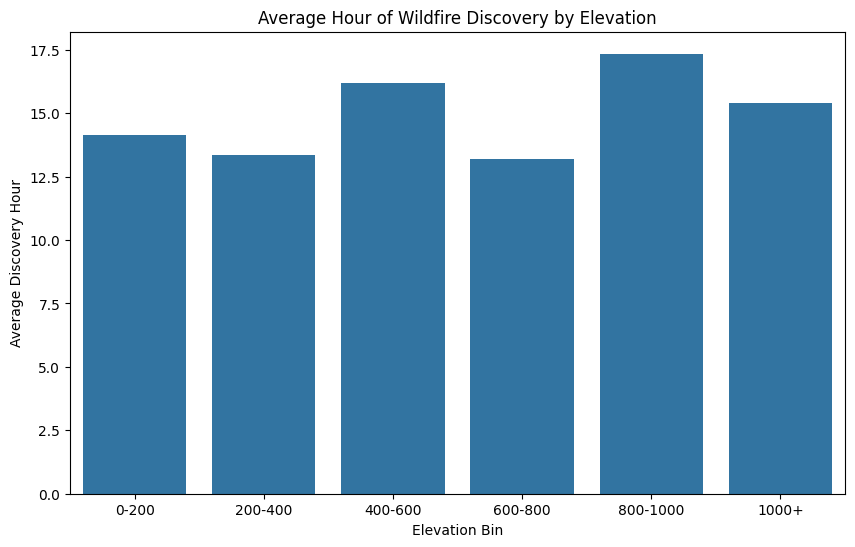

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df_cleaned['discovery_hour'] = df_cleaned['attr_FireDiscoveryDateTime'].dt.hour
df_cleaned['elevation_bin'] = pd.cut(df_cleaned['ELEVATION'], bins=[0, 200, 400, 600, 800, 1000, np.inf], labels=['0-200', '200-400', '400-600', '600-800', '800-1000', '1000+'])

# Group by elevation_bin and calculate mean discovery hour
elevation_time_analysis = df_cleaned.groupby('elevation_bin')['discovery_hour'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='elevation_bin', y='discovery_hour', data=elevation_time_analysis)
plt.xlabel('Elevation Bin')
plt.ylabel('Average Discovery Hour')
plt.title('Average Hour of Wildfire Discovery by Elevation')
plt.show()


In [9]:
# Calculate Pearson correlation coefficient
correlation = df_cleaned[['ELEVATION', 'discovery_hour']].corr(method='pearson')
print(correlation)


                ELEVATION  discovery_hour
ELEVATION        1.000000        0.042712
discovery_hour   0.042712        1.000000
